**<font color = black size=6>实验六:降维和聚类</font>**

本次实验为编写机器学习中的用于降维的PCA(主成分分析)和聚类的k-means算法。在本次实验中，我们将对一个维度过高的数据集进行降维，之后对降维后的数据进行聚类。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib as mpl
from pandas.core.frame import DataFrame
import warnings
warnings.filterwarnings('ignore')

**<font color = blue size=4>第一部分:函数介绍</font>**

介绍一些可以用到的函数

1.计算方阵的特征值和特征向量

In [2]:
a=np.array([[1,0,0],[0,2,0],[0,0,3]])
vals,vecs=np.linalg.eig(a)
print("该矩阵的特征值:",vals)
print("该矩阵的特征向量:",vecs)
list(vecs)[0:2]

该矩阵的特征值: [1. 2. 3.]
该矩阵的特征向量: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


[array([1., 0., 0.]), array([0., 1., 0.])]

2.排序函数

In [3]:
#list的排序
a=[3,1,2,4]
a.sort(reverse=True)
print(a)
#字典的排序
a=[3,1,2,4]
b=[[0,0,3,0],[1,0,0,0],[0,2,0,0],[0,0,0,4]]
c = [(a[i],b[i]) for i in range(len(a))]
print("未排序前:",c)
c=sorted(c,reverse=True)
print("排序后:",c)


[4, 3, 2, 1]
未排序前: [(3, [0, 0, 3, 0]), (1, [1, 0, 0, 0]), (2, [0, 2, 0, 0]), (4, [0, 0, 0, 4])]
排序后: [(4, [0, 0, 0, 4]), (3, [0, 0, 3, 0]), (2, [0, 2, 0, 0]), (1, [1, 0, 0, 0])]


**<font color = blue size=4>第二部分:实验任务</font>**

**<font color = green size=3>1):降维</font>**

<span style="color:purple">1.将训练集"train_data.csv"导入，训练集共有167个样本，每个样本有9个属性，将原始数据按列组成9行167列的矩阵X</span>

In [4]:
train_frame = pd.read_csv('train_data.csv')
train = np.array(train_frame)
train.T

array([[9.02e+01, 1.66e+01, 2.73e+01, ..., 2.33e+01, 5.63e+01, 8.31e+01],
       [1.00e+01, 2.80e+01, 3.84e+01, ..., 7.20e+01, 3.00e+01, 3.70e+01],
       [7.58e+00, 6.55e+00, 4.17e+00, ..., 6.84e+00, 5.18e+00, 5.89e+00],
       ...,
       [5.62e+01, 7.63e+01, 7.65e+01, ..., 7.31e+01, 6.75e+01, 5.20e+01],
       [5.82e+00, 1.65e+00, 2.89e+00, ..., 1.95e+00, 4.67e+00, 5.40e+00],
       [5.53e+02, 4.09e+03, 4.46e+03, ..., 1.31e+03, 1.31e+03, 1.46e+03]])

<span style="color:purple">2.对所有样本进行中心化，即将X的每一行减去这一行的均值</span>

In [5]:
tem = np.average(train,axis=0)

train = train - tem




<span style="color:purple">3.求出协方差矩阵$X$.$X^T$</span>

In [6]:
xie = np.dot(train.T,train)


<span style="color:purple">4.对协方差矩阵$X$.$X^T$做特征值分解，即求出协方差矩阵的特征值$\vec{\lambda}=\{\lambda_1,\lambda_2,...,\lambda_d\}$及对应的特征向量$\vec{\omega}=\{\omega_1,\omega_2,...,\omega_d\}$. 其中$\lambda_i \sim \omega_i$.</span>

In [7]:
lamb,w = np.linalg.eig(xie)

<span style="color:purple">5.选取降维后的维度k：依据特征值计算方差的贡献率，先将所有特征值按照降序进行排序。要求降维后的数据方差占比超过阈值t%，公式如下. 我们这里取阈值为t%=99%:
    $$\frac{\sum_{i=1}^k\lambda_i}{\sum_{i=1}^d\lambda_i} \geq t\%$$
</span>

In [8]:
lamblist = list(lamb)
lamblist.sort(reverse=True)

total = np.sum(lamb)
cum = 0
k = -1
# print(total)
for i in range(len(lamb)):
    cum+=lamblist[i]
#     print(cum)
    if cum/total>=0.99:
        k=i
        break
# k

<span style="color:purple">6.将特征向量按对应特征值大小从上到下按行排列，取前k个对应特征值最大的特征向量组成投影矩阵W=($\omega_1,\omega_2,...,\omega_k$)</span>

In [9]:
wlist=list(w)
lambnew=lamblist[0:k+1]
wnew=wlist[0:k+1]
W = []
for i in range(len(lambnew)):
    W.append(wnew[i])
W = np.array(W)
W.shape

(2, 9)

<span style="color:purple">7.根据公式$Y=P.X$得到降维到k维后的数据集Y。

In [10]:
Y = np.dot(W,train.T)
Y.shape

(2, 167)

**<font color = green size=3>2):聚类</font>**

In [11]:
# x = np.array([1,2,3])
# y=np.array([8,3,3])
# a=(x-y)**2
# t=np.sum(a)
# math.sqrt(t)

由于降维实验任务中降维后的维数符号为k，而聚类实验中聚类数目的符号也为k，为了区别，我们将聚类实验中聚类数目的符号改为$k_c$

<span style="color:purple">1.首先编写计算衡量样本间的相似度的距离，这里列举两种距离公式.</span>
    
<span style="color:purple">a.曼哈顿距离计算公式:  
    对于两个d维的样本$x_i$,$x_j$,他们的曼哈顿距离计算公式为:  
    $$dist_{man}(x_i,x_j)=\sum_{u=1}^d |x_{iu}-x_{ju}|$$
其中$x_{iu}$和$x_{ju}$分别为样本$x_i$和$x_j$的第u维特征值</span>

<span style="color:purple">b.欧式距离计算公式:  
    对于两个d维的样本$x_i$,$x_j$,他们的欧式距离计算公式为:  
    $$dist_{ed}(x_i,x_j)=\sqrt{\sum_{u=1}^d (x_{iu}-x_{ju})^2}$$
其中$x_{iu}$和$x_{ju}$分别为样本$x_i$和$x_j$的第u维特征值</span>

In [12]:
#这里选取了欧式距离

def dis(x,y):
    
    total = np.sum((x-y)**2)
    dist = math.sqrt(total)  
    return dist


<span style="color:purple">2.确定聚类簇数$k_{c}$，然后从前面所得到的降维数据集Y中随机选取$k_{c}$个样本作为初始均值向量$\{\mu_1,\mu_2,...,\mu_{k_{c}}\}$</span>


In [25]:
kc =6#########################################


B = Y[:,np.random.choice(Y.shape[1],kc,replace=False)]
B
B.shape
# t=B
# print(id(t))
# print(id(B))


2802442928576
2802442928576


In [20]:
# C = [[],[],[]]
# C[0].append(Y[:,0])
# C[0].append(Y[:,1])
# print(Y[:,0])
# print(Y[:,1])
# C[0]= np.array(C[0])
# np.sum(C[0],axis=0)/len(C[0])
# A = []
# A=C
# A

In [21]:
np.zeros((2,3))
# plt.scatter(Y[0,:],Y[1,:])
# plt.show()

array([[0., 0., 0.],
       [0., 0., 0.]])

<span style="color:purple">3.开始进行迭代。每一轮更新均值向量，直到均值向量不再变化则停止迭代</span>

<span style="color:purple">迭代步骤1).遍历每个样本$x_j$,计算其与当前的各个均值向量$\mu_i$的距离$d_{ji}$，比较与每个均值向量的距离大小，
   $$\lambda_j=arg min_{i \in \{1,2,...,k_{c}\}}d_{ji}$$ 
    将其划入与其距离最近的簇中。
$$C_{\lambda_j}=C_{\lambda_j}\bigcup{x_j}$$</span>
<span style="color:purple">迭代步骤2).将所有样本划分完成生成$k_{c}$个簇$\{C_1,C_2,...,C_{k_{c}}\}$。对于每个簇$C_i$，计算该簇的新均值向量，公式为:
$$\mu_i^{'}=\frac{1}{|C_i|}\sum_{x \in C_i}x$$</span>
<span style="color:purple">迭代步骤3).将更新的均值向量$\{\mu_1^{'},\mu_2^{'},...,\mu_{k_{c}}^{'}\}$与该轮未更新前的均值向量$\{\mu_1,\mu_2,...,\mu_{k_{c}}\}$进行比较.  如果完全一样，则结束迭代；如果不一样，则继续迭代.</span>

In [22]:


cluster = []
time = 0

while True:
    C = []
    for i in range(kc):
        C.append([])
    for i in range(Y.shape[1]):
        tem = 100000000
        temj =-1
        for j in range(B.shape[1]):
             if dis(Y[:,i],B[:,j])<tem:
                    tem = dis(Y[:,i],B[:,j])
                    temj=j
        C[temj].append(Y[:,i])
    for i in range(kc):
        C[i]=np.array(C[i])
    t = np.zeros((2,kc))

    for i in range(kc):
        t[:,i]=np.sum(C[i],axis=0)/len(C[i])

    time += 1
    if (t==B).all():
        cluster = C
        break
    B=t
    
print(time)                

9


<span style="color:purple">4.判断是否有空簇，返回所有非空的簇</span>

In [23]:
for i in range(kc):
    if len(cluster[i])==0:
        del cluster[i]


<span style="color:purple">5.请从降维的属性值选择其中两个作为绘图的横纵坐标，将所有样本绘制到一张图中，其中同一聚类的样本点绘制为相同颜色</span>

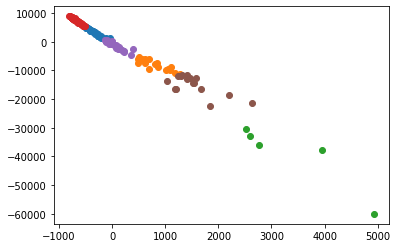

In [24]:
for i in range(len(cluster)):
    plt.scatter(cluster[i][:,0],cluster[i][:,1])
    
plt.show()
# print(cluster)
# print(len(cluster))

**<font color = blue size=4>第三部分:作业提交</font>**

一、实验课下课前提交完成代码，如果下课前未完成，请将已经完成的部分进行提交，未完成的部分于之后的实验报告中进行补充  
要求:  
1)文件格式为：学号-姓名.ipynb  
2)【不要】提交文件夹、压缩包、数据集等无关文件，只需提交单个ipynb文件即可，如果交错请到讲台前联系助教，删掉之前的错误版本后再进行提交

二、因为下周为考试周，本次实验报告下下周（4月29号前）交  
要求：  
1)文件格式为：学号-姓名.pdf  
2)【不要】提交文件夹、压缩包、代码文件、数据集等任何与实验报告无关的文件，只需要提交单个pdf文件即可  
3)文件命名时不需要额外添加“实验几”等额外信息，按照格式提交  
4)每周的实验报告提交地址会变化，且有时间限制，提交时间为下周的实验课开始时，请注意及时提交。

实验六(降维和聚类)的实验报告:  
截止时间：2022-04-29 10:10  
提交地址：https://workspace.jianguoyun.com/inbox/collect/ca2e57db0307478f99e50dbf0f8b3cb6/submit

三、课堂课件获取地址:https://www.jianguoyun.com/p/DQlpUFYQp5WhChiS_q0E  
实验内容获取地址:https://www.jianguoyun.com/p/DbKbP-AQp5WhChi1sa0E